In [2]:
## 시각화, 데이터 파악
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 로딩
titanic_df = pd.read_csv('../data/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# 학습 데이터 기본 정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Nan 확인
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# NaN fill
# 나이 : 177개
# titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) # 원본에 반영
# 선착장 : 2개
titanic_df['Embarked'].fillna('N', inplace=True)
# # 방호수 : 687개
titanic_df['Cabin'].fillna('N', inplace=True)
print(f'데이터 세트 Null 값 개수 : {titanic_df.isna().sum()}')

데이터 세트 Null 값 개수 : PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [7]:
# 인코딩 : 문자열값 => 숫자 변환
# 문자열 데이터들의 값의 분포 확인
# 성별
print(f'Sex 값 분포 \n{titanic_df["Sex"].value_counts()}')
print(f'Cabin 값 분포 \n{titanic_df["Cabin"].value_counts()}')
print(f'Embarked 값 분포 \n{titanic_df["Embarked"].value_counts()}')

Sex 값 분포 
Sex
male      577
female    314
Name: count, dtype: int64
Cabin 값 분포 
Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked 값 분포 
Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [8]:
# Cabin 전처리 => 문자 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[0:1] # 문자열 슬라이싱

In [9]:
# 성별(Sex), 생존별 대한 생존(Survived) 수(count) 확인
# titanic_df.groupby(['Sex', 'Survived'])
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

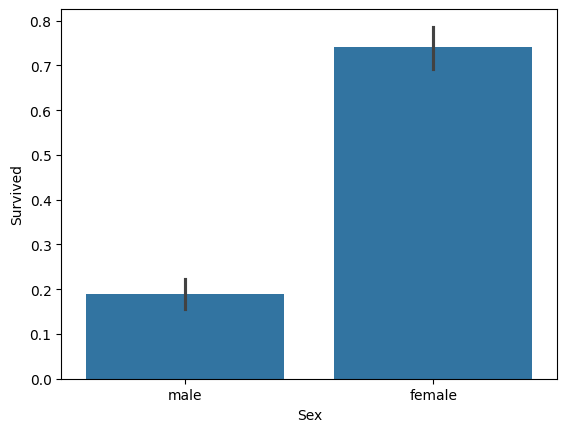

In [10]:
# 시각화
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

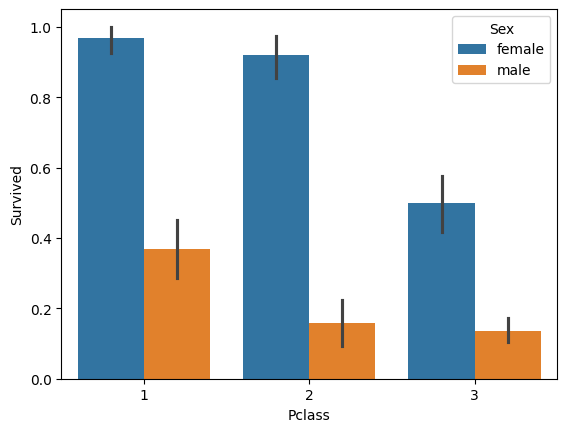

In [11]:
# 성별 등급별 생존 확인
sns.barplot(
      x='Pclass'
    , y='Survived'
    , hue='Sex'
    , data=titanic_df
)

In [12]:
# 나이를 카테고리로 변환
def get_cate(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

<Axes: xlabel='Age_cat', ylabel='Survived'>

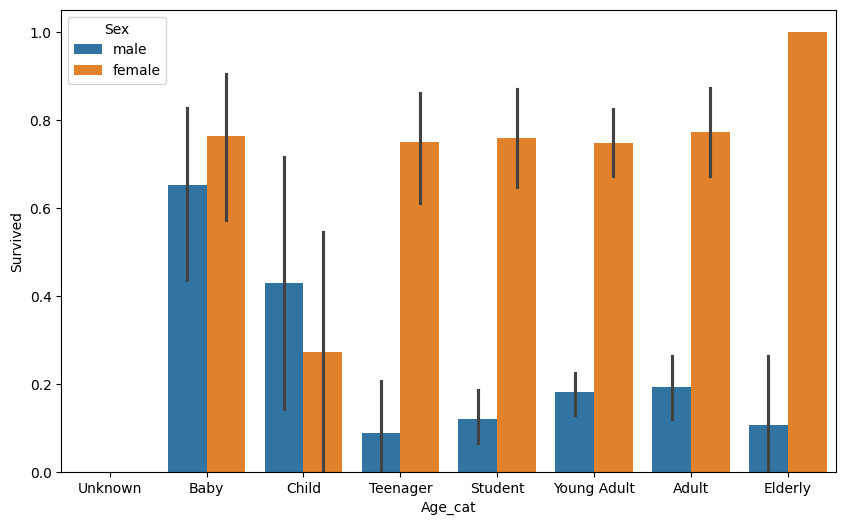

In [13]:
# 막대 그래프
# 크기 확대
plt.figure(figsize=(10, 6))

# x축에 들어갈 레이블 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_cate(x))
sns.barplot(
      x='Age_cat'
    , y='Survived'
    , hue='Sex'
    , data=titanic_df
    , order=group_names
)

In [14]:
# Age_cat 컬럼 삭제
titanic_df.drop(['Age_cat'], axis=1, inplace=True)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C


In [15]:
# 인코딩 진행
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### NEXT

In [16]:
#### 인코딩
## Sex, Cabin, Embarked => LabelEncoder 0, 1, 2, 3, ~~~
# 함수
# encode_features(dataframe) : return dataframe
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF): # dataDF : titanic dataframe
    # 입력으로 들어온 데이터프레임을 가공(인코딩)해서 반환
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        # 1. LabelEncoder object 생성
        le = LabelEncoder()
        # 2. fit() : 사전작업 => 인덱스를 추출
        le = le.fit(dataDF[feature]) # 처음에 feature는 Sex 컬럼이다 => 0(m), 1(f)
        # 3. transform() : 변환
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [18]:
titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [19]:
# 함수 선언시 매개변수와 반환값에 타입 힌트 적용 : 파이썬 3.5 부터 적용
# 개발툴에서 타입 검사를 수행하는데 도움 => 개발 효율성 증대
# 타입 검사는 안한다 => 지정한 타입으로 처리 안될때 에러 발생하지 않는다
# 기본 문법
# def 함수이름(매개변수1:타입, 매개변수2:타입) -> 반환타입:
#     함수가 수행할 작업
#     return 결과
# 예제
def greet(name: str) -> None:
    print(f'Hello, {name}')
    return None

greet('고길동')
greet('홍길동')

Hello, 고길동
Hello, 홍길동


In [20]:
# 타이타닉 데이터 전처리
def fillna(df: pd.DataFrame) -> pd.DataFrame:
    df['Age'].fillna(df['Age'].mean(), inplace=True) # 나이컬럼에 NaN을 평균으로 채운다
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 필요없는 컬럼 삭제 함수
def drop_features(df: pd.DataFrame) -> pd.DataFrame:
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df: pd.DataFrame) -> pd.DataFrame:
    # Cabin 칼럼의 첫번째 문자 추출
    df['Cabin'] = df['Cabin'].str[:1]
    # 레이블 인코딩 컬럼 3개 지정
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

In [21]:
def transform_features(df: pd.DataFrame) -> pd.DataFrame:
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [22]:
# 학습데이터 전처리 , 테스트데이터 전처리 동일 처리 필요
# 학습데이터 전처리 : 학습에 사용할 데이터(X), 학습에 사용할 답(y)
# 1. 데이터 적재
titanic_df = pd.read_csv('../data/titanic/train.csv')
# 2. 데이터, 답(숫자)을 분리
y_titanic_df = titanic_df['Survived'] # 복사 추출 후 대입, 원본에 Survived 존재한다
# 3. 데이터만 분리
X_titanic_df = titanic_df.drop('Survived', axis=1, inplace=False)
# # 4. 데이터만 전처리
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.25,7,3


In [23]:
# 데이터 분리 => 학습에 사용할 데이터와 테스트에 사용할 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

X_train.shape, X_test.shape

((712, 8), (179, 8))

In [24]:
# 학습 진행
# 분류에 사용하는 알고리즘 적용해서 정확도 추출
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# 정확도 점수 함수
from sklearn.metrics import accuracy_score

In [25]:
# 알고리즘 오브젝트 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# 알고리즘별 학습/예측/평가
# 1. 학습
dt_clf.fit(X_train, y_train) # 학습 완료 -> Model 완료
# 2. 예측값 추출
dt_pred = dt_clf.predict(X_test) # 테스트데이터 입력해서 예측값(0, 1)을 추출
# print(f'생존 예측값 {pred}')
# print(f'첫번째 테스트데이터에 대한 생존 예측값 {pred[0]}')
# print(f'첫번째 테스트데이터 {X_test.head(1)}')
# print(f'첫번째 테스트데이터에 대한 원래답 : {y_test.head(1)}')
# 3. 원래답(y_test)과 예측값(dt_pred)의 정확도 점수
score = accuracy_score(y_test, dt_pred)
print(f'DecisionTreeClassifier 정확도 : {score:.4f}')

DecisionTreeClassifier 정확도 : 0.7877


In [26]:
# RandomForest 학습/예측값/평가
# 1. 학습
rf_clf.fit(X_train, y_train)
# 2. 예측값 추출
rf_pred = rf_clf.predict(X_test)
# 3. 정확도 평가
rf_score = accuracy_score(y_test, rf_pred)
print(f'RandomForestClassifier 정확도 : {rf_score:.4f}')

RandomForestClassifier 정확도 : 0.8547


In [27]:
# LogisticRegression 학습/예측값/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_score = accuracy_score(y_test, lr_pred)
print(f'LogisticRegression 정확도 : {lr_score:.4f}')

LogisticRegression 정확도 : 0.8659


In [28]:
# Cross Validation : 5개 => KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5): # clf 분류알고리즘, folds 개수
    kfold = KFold(n_splits=folds) # 5개
    
    scores = [] # 폴드를 5개 생성 => 정확도 점수 5개 출력 => 저장 리스트 => 평균
    # train_index : 학습, test_index : 예측, 평가
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # 학습에 사용한 데이터와 테스트에 사용할 데이터 추출
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        # 학습/테스트에 사용할 답 추출
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # 1. 학습
        clf.fit(X_train, y_train)
        # 2. 예측 값 추출
        predictions = clf.predict(X_test) # 테스트데이터에 대한 예측값
        acc = accuracy_score(y_test, predictions)
        scores.append(acc)
        print(f'교차 검증 {iter_count + 1} 정확도 : {acc:.4f}')
    # 5번의 교차검증 정확도의 평균
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score:.4f}')

In [29]:
# dt_clf, rf_clf, lr_clf
exec_kfold(dt_clf)

교차 검증 1 정확도 : 0.7542
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.7697
교차 검증 5 정확도 : 0.8202
평균 정확도 : 0.7823


In [30]:
exec_kfold(rf_clf)

교차 검증 1 정확도 : 0.7933
교차 검증 2 정확도 : 0.8090
교차 검증 3 정확도 : 0.8371
교차 검증 4 정확도 : 0.7753
교차 검증 5 정확도 : 0.8596
평균 정확도 : 0.8148


In [31]:
exec_kfold(lr_clf)

교차 검증 1 정확도 : 0.7933
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.7472
교차 검증 5 정확도 : 0.8427
평균 정확도 : 0.7901


In [32]:
# cross_val_score()
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
print(scores)
print(f'평균 정확도 : {np.mean(scores):.4f}')

[0.74301676 0.7752809  0.79213483 0.78651685 0.84269663]
평균 정확도 : 0.7879


In [33]:
# GridSearchCV : 하이퍼파라미터 튜닝
# DecisionTreeClassifier : max_depth, min_samples_split, min_samples_leaf
# 
from sklearn.model_selection import GridSearchCV
parameters = {
      'max_depth': [2, 3, 5, 10] # 4번 반복 => 4개 모델 생성
    , 'min_samples_split': [2, 3, 5] # 3번 반복
    , 'min_samples_leaf': [1, 5, 8] # 3번 반복, 4 X 3 X 3 = 36개 모델 생성, 36번 학습
}
grid_dt_clf = GridSearchCV( # object 생성만 한 것이다
      dt_clf # 알고리즘
    , param_grid=parameters # 36번 반복
    , scoring='accuracy' # 평가 방법 지정 : 정확도
    , cv=5 # 5번 반복, 전체 180번 반복
)
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [34]:
print(f'최고 점수 : {grid_dt_clf.best_score_}')

최고 점수 : 0.7991825076332119


In [35]:
# 최적 모델 추출 (학습이 종료된)
best_dt_clf = grid_dt_clf.best_estimator_
# 1. 예측 값 추출
pred = best_dt_clf.predict(X_test)
# 2. 점수 추출
acc_score = accuracy_score(y_test, pred)
print(f'최적 정확도 : {acc_score:.4f}')

최적 정확도 : 0.8715
